In [1]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from keras import regularizers
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

In [2]:
# Load the mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


*Preprocessing the Images*

In [3]:
# since Convolutional Neural Network Model is 4 dimension
# the data will need to be reshaped into 4D
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


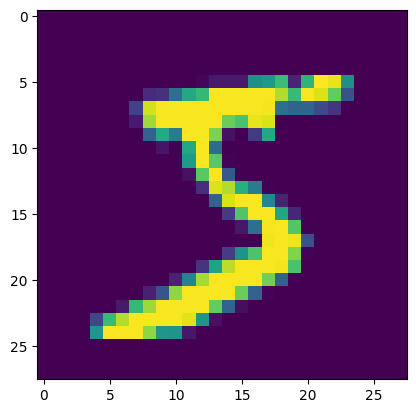

In [4]:
plt.imshow(x_train[0])

In [5]:
# Normalizing the pixel values by dividing by 255 to bring the range between 0 to 1
x_train = x_train / 255.0
x_test = x_test / 255.0


In [6]:
# Defining parameters for data augmentation of training sets
datagen_train = ImageDataGenerator(
    rotation_range=20,  # Randomly rotate images up to 20 degrees
    width_shift_range=0.1,  # Randomly shift images up to 10% of the width horizontally
    height_shift_range=0.1,  # Randomly shift images  up to 10% of the height vertically
    horizontal_flip=True,  # Randomly flip images horizontally
    vertical_flip=False,  # Don't randomly flip images vertically
    shear_range=0.10, # crops part of the image
    zoom_range=0.10 # #zooms the image by 10%
)

In [7]:
# Fit the transformation to the training dataset
datagen_train.fit(x_train)

In [8]:
# Creating of model having strides of 3 covulation blocks
mnist_model = Sequential()
mnist_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))

mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model.add(MaxPooling2D(pool_size=(2,2)))

mnist_model.add(Flatten())
mnist_model.add(Dense(128,activation = 'relu'))
mnist_model.add(Dropout(0.5))
mnist_model.add(Dense(10,activation = 'softmax'))

In [9]:
mnist_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

In [10]:
# Compile Model using Adam
adam=Adam(learning_rate=0.001) #learning rate of 0.001
mnist_model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
# Model training with 20 epochs and batch size of 32
# Convert integer class labels into one-hot encoded vectors using to_categorical () method;

history=mnist_model.fit(datagen_train.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
1875/1875 [==============================] - 109s 57ms/step - loss: 0.5367 - accuracy: 0.8248 - val_loss: 0.0849 - val_accuracy: 0.9709
Epoch 2/20
1875/1875 [==============================] - 87s 47ms/step - loss: 0.2215 - accuracy: 0.9349 - val_loss: 0.0580 - val_accuracy: 0.9811
Epoch 3/20
1875/1875 [==============================] - 84s 45ms/step - loss: 0.1674 - accuracy: 0.9497 - val_loss: 0.0846 - val_accuracy: 0.9727
Epoch 4/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1453 - accuracy: 0.9575 - val_loss: 0.0514 - val_accuracy: 0.9838
Epoch 5/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1322 - accuracy: 0.9604 - val_loss: 0.0612 - val_accuracy: 0.9817
Epoch 6/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.1198 - accuracy: 0.9648 - val_loss: 0.0559 - val_accuracy: 0.9814
Epoch 7/20
1875/1875 [==============================] - 85s 45ms/step - loss: 0.1102 - accuracy: 0.9675 - val_loss: 0.0568 

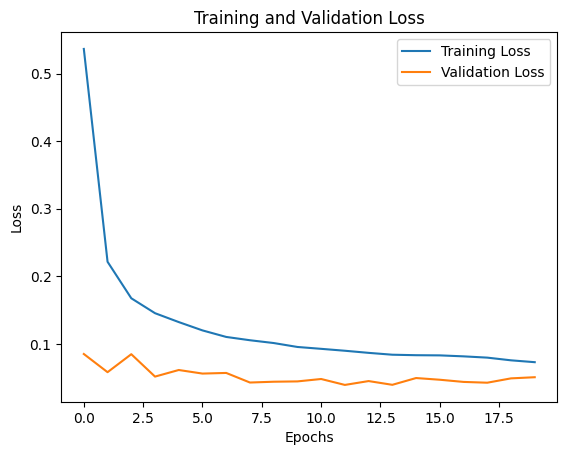

In [12]:
# Checking for overfitting: Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

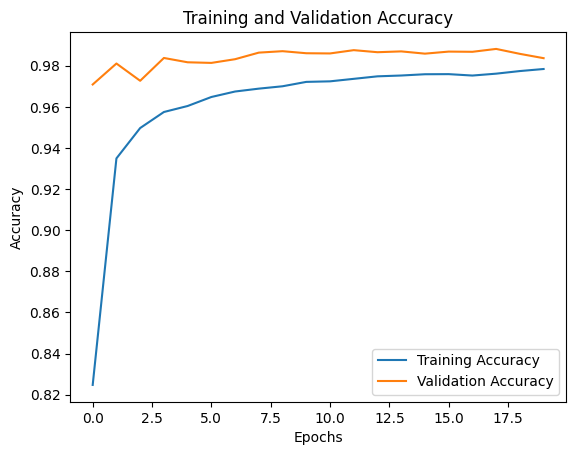

In [13]:
# Training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
y_pred = np.argmax(mnist_model.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      0.99       982
           5       0.97      0.97      0.97       892
           6       0.97      0.97      0.97       958
           7       0.99      0.99      0.99      1028
           8       0.97      1.00      0.98       974
           9       1.00      0.96      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



<Figure size 2000x3000 with 0 Axes>

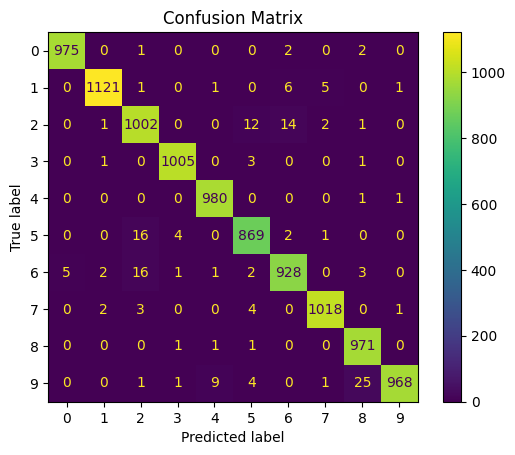

In [16]:
# confusion matrix
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

**Using various Regularization Methods**

Use of L1 and L2 Regularizer

In [28]:
mnist_model1 = Sequential()

mnist_model1.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same',
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
mnist_model1.add(MaxPooling2D(pool_size=(2,2)))

mnist_model1.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
mnist_model1.add(MaxPooling2D(pool_size=(2,2)))

mnist_model1.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu',
                       kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))
mnist_model1.add(MaxPooling2D(pool_size=(2,2)))

mnist_model1.add(Flatten())
mnist_model1.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001)))

mnist_model1.add(Dense(10, activation='softmax'))

# print the summary of the model constructed
mnist_model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [29]:
mnist_model1.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history=mnist_model1.fit(datagen_train.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=20, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/20
1875/1875 [==============================] - 88s 47ms/step - loss: 6.3950 - accuracy: 0.5415 - val_loss: 4.1532 - val_accuracy: 0.8669
Epoch 2/20
1875/1875 [==============================] - 87s 46ms/step - loss: 3.3716 - accuracy: 0.8057 - val_loss: 2.2520 - val_accuracy: 0.9070
Epoch 3/20
1875/1875 [==============================] - 87s 47ms/step - loss: 1.9136 - accuracy: 0.8394 - val_loss: 1.2649 - val_accuracy: 0.9173
Epoch 4/20
1875/1875 [==============================] - 85s 45ms/step - loss: 1.2016 - accuracy: 0.8622 - val_loss: 0.8274 - val_accuracy: 0.9281
Epoch 5/20
1875/1875 [==============================] - 86s 46ms/step - loss: 0.8987 - accuracy: 0.8776 - val_loss: 0.6560 - val_accuracy: 0.9376
Epoch 6/20
1875/1875 [==============================] - 87s 46ms/step - loss: 0.7812 - accuracy: 0.8859 - val_loss: 0.6162 - val_accuracy: 0.9253
Epoch 7/20
1875/1875 [==============================] - 88s 47ms/step - loss: 0.7178 - accuracy: 0.8960 - val_loss: 0.5450 -

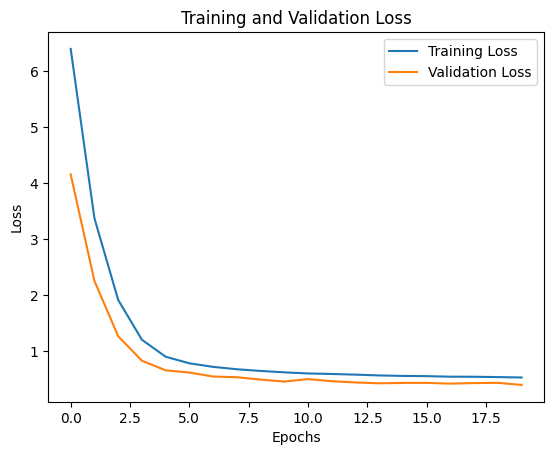

In [31]:
# Checking for overfitting: Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

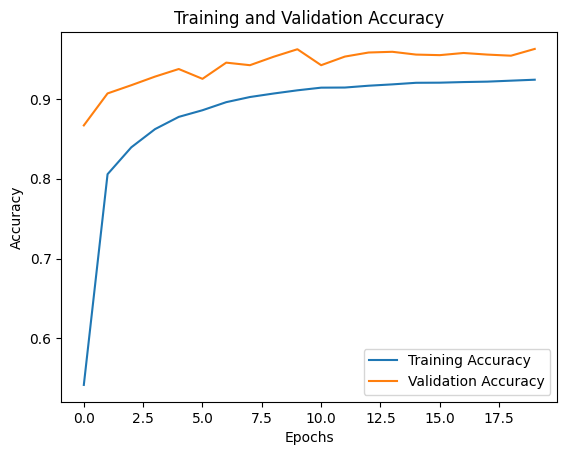

In [32]:
# Training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [33]:
y_pred = np.argmax(mnist_model1.predict(x_test), axis=-1)
print(classification_report(y_test, y_pred))

313/313 [==============================] - 4s 13ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.91      0.96      0.94      1032
           3       0.95      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.90      0.93       892
           6       0.98      0.96      0.97       958
           7       0.97      0.97      0.97      1028
           8       0.96      0.96      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.96     10000
   macro avg       0.96      0.96      0.96     10000
weighted avg       0.96      0.96      0.96     10000



<Figure size 2000x3000 with 0 Axes>

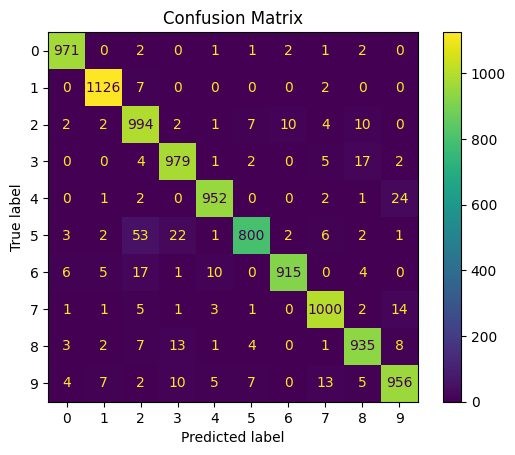

In [34]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

Using Early Stopping

In [35]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [36]:
# Split the training data into training and validation sets
split = int(0.8 * len(x_train))
x_train, x_val = x_train[:split], x_train[split:]
y_train, y_val = y_train[:split], y_train[split:]

# Reshape the input data and convert the labels to categorical
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [37]:
# define and compile your model
mnist_model2 = Sequential()
mnist_model2.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model2.add(MaxPooling2D(pool_size=(2,2)))
mnist_model2.add(Flatten())
mnist_model2.add(Dense(128,activation = 'relu'))
mnist_model2.add(Dense(10,activation = 'softmax'))

mnist_model2.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# define the early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=10)


# train the model
mnist_model2.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100, batch_size=128, callbacks=[early_stopping])


Epoch 1/100
375/375 [==============================] - 49s 129ms/step - loss: 1.1643 - accuracy: 0.6815 - val_loss: 0.2595 - val_accuracy: 0.9194
Epoch 2/100
375/375 [==============================] - 48s 128ms/step - loss: 0.2148 - accuracy: 0.9316 - val_loss: 0.1705 - val_accuracy: 0.9459
Epoch 3/100
375/375 [==============================] - 48s 128ms/step - loss: 0.1542 - accuracy: 0.9511 - val_loss: 0.1468 - val_accuracy: 0.9536
Epoch 4/100
375/375 [==============================] - 49s 131ms/step - loss: 0.1228 - accuracy: 0.9602 - val_loss: 0.1133 - val_accuracy: 0.9649
Epoch 5/100
375/375 [==============================] - 49s 131ms/step - loss: 0.0981 - accuracy: 0.9682 - val_loss: 0.0983 - val_accuracy: 0.9688
Epoch 6/100
375/375 [==============================] - 47s 125ms/step - loss: 0.0797 - accuracy: 0.9742 - val_loss: 0.1192 - val_accuracy: 0.9652
Epoch 7/100
375/375 [==============================] - 46s 122ms/step - loss: 0.0638 - accuracy: 0.9791 - val_loss: 0.0860 -

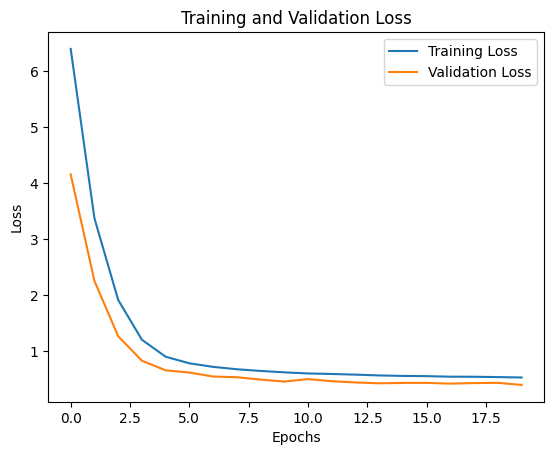

In [38]:
# Checking for overfitting: Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

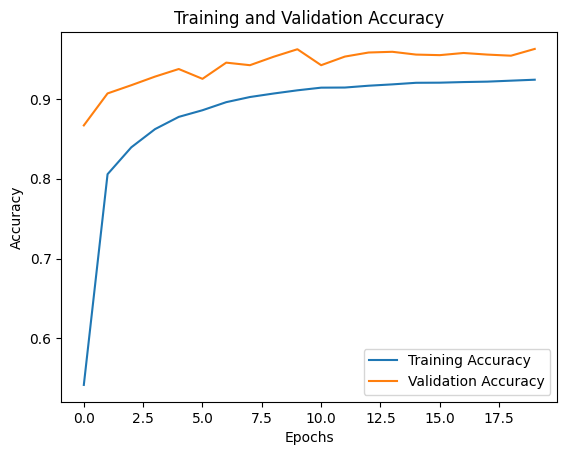

In [39]:
# Training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
y_pred = np.argmax(mnist_model2.predict(x_test), axis=-1)

313/313 [==============================] - 4s 13ms/step


In [41]:
y_pred = to_categorical(y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.98      0.98       974
           9       0.98      0.97      0.98      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000



**Varying Number of Convolution Blocks**

In [42]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [43]:
datagen_train.fit(x_train)

Using 4 Convolultion Blocks

In [44]:
mnist_model3 = Sequential()

# First convolution block
mnist_model3.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu', padding='same'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))

# Second convolution block
mnist_model3.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))

# Third convolution block
mnist_model3.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))

# Fourth convolution block
mnist_model3.add(Conv2D(filters=256, kernel_size=(3,3), activation='relu', padding='same'))
mnist_model3.add(MaxPooling2D(pool_size=(2,2)))


# Flattening and dense layers
mnist_model3.add(Flatten())
mnist_model3.add(Dense(128, activation='relu'))
mnist_model3.add(Dropout(0.5))
mnist_model3.add(Dense(10, activation='softmax'))

In [45]:
mnist_model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 128)        

In [46]:
mnist_model3.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
history=mnist_model3.fit(datagen_train.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 156s 83ms/step - loss: 1.0337 - accuracy: 0.6508 - val_loss: 0.2041 - val_accuracy: 0.9358
Epoch 2/10
1875/1875 [==============================] - 155s 82ms/step - loss: 0.3244 - accuracy: 0.9042 - val_loss: 0.0851 - val_accuracy: 0.9719
Epoch 3/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.2289 - accuracy: 0.9346 - val_loss: 0.1008 - val_accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1919 - accuracy: 0.9455 - val_loss: 0.0667 - val_accuracy: 0.9786
Epoch 5/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1665 - accuracy: 0.9528 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 6/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1460 - accuracy: 0.9584 - val_loss: 0.0559 - val_accuracy: 0.9833
Epoch 7/10
1875/1875 [==============================] - 154s 82ms/step - loss: 0.1400 - accuracy: 0.9605 - val_loss: 0

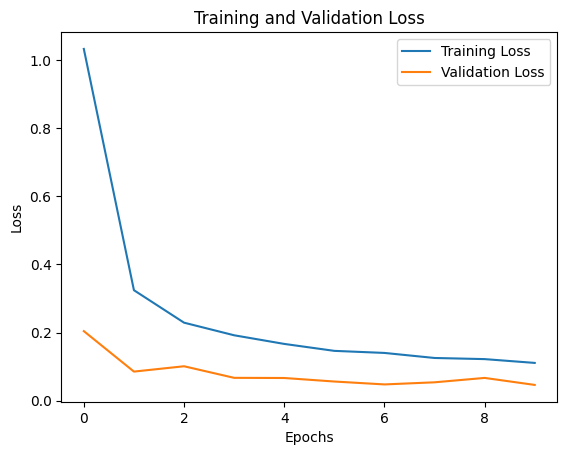

In [48]:
# Checking for overfitting: Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

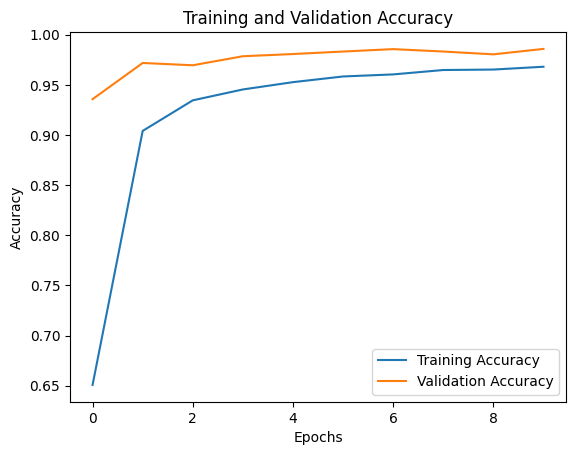

In [49]:
# Training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [50]:
y_pred = np.argmax(mnist_model3.predict(x_test), axis=-1)

313/313 [==============================] - 6s 20ms/step


In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.99      0.98      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.97      0.98      0.97       892
           6       0.98      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.98      1.00      0.99       974
           9       1.00      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



<Figure size 2000x3000 with 0 Axes>

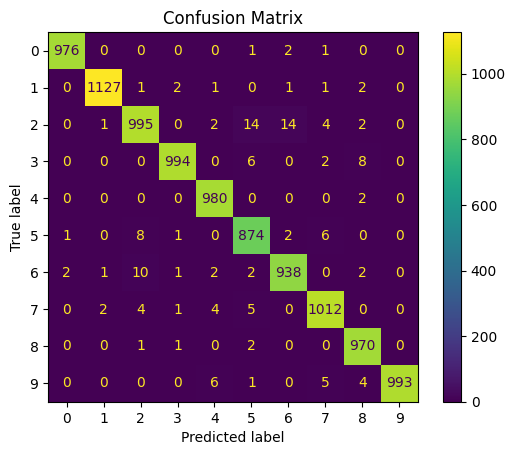

In [52]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()

Varying Learning Rates: Using Learning rate =0.1

In [53]:
# Creating of model having strides of 3 covulation blocks
mnist_model4 = Sequential()
mnist_model4.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation = 'relu',padding = 'same'))

mnist_model4.add(MaxPooling2D(pool_size=(2,2)))

mnist_model4.add(Conv2D(filters=64,kernel_size=(3,3),activation = 'relu'))
mnist_model4.add(MaxPooling2D(pool_size=(2,2)))

mnist_model4.add(Conv2D(filters=128,kernel_size=(3,3),activation = 'relu'))
mnist_model4.add(MaxPooling2D(pool_size=(2,2)))

mnist_model4.add(Flatten())
mnist_model4.add(Dense(128,activation = 'relu'))
mnist_model4.add(Dropout(0.5))
mnist_model4.add(Dense(10,activation = 'softmax'))

In [54]:
mnist_model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 6, 6, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_15 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 2, 2, 128)        

In [55]:
# Compile Model using Adam
adam=Adam(learning_rate=0.1) #learning rate of 0.1
mnist_model4.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

In [56]:
# Model training with 10 epochs and batch size of 32
# Convert integer class labels into one-hot encoded vectors using to_categorical () method;

history=mnist_model4.fit(datagen_train.flow(x_train, keras.utils.to_categorical(y_train), batch_size=32),
          epochs=10, validation_data=(x_test, keras.utils.to_categorical(y_test)))

Epoch 1/10
1875/1875 [==============================] - 87s 45ms/step - loss: 110.9902 - accuracy: 0.1033 - val_loss: 2.3162 - val_accuracy: 0.0982
Epoch 2/10
1875/1875 [==============================] - 85s 45ms/step - loss: 2.3141 - accuracy: 0.1016 - val_loss: 2.3097 - val_accuracy: 0.1010
Epoch 3/10
1875/1875 [==============================] - 86s 46ms/step - loss: 2.3140 - accuracy: 0.1018 - val_loss: 2.3113 - val_accuracy: 0.1009
Epoch 4/10
1875/1875 [==============================] - 83s 44ms/step - loss: 2.3131 - accuracy: 0.1009 - val_loss: 2.3108 - val_accuracy: 0.0980
Epoch 5/10
1875/1875 [==============================] - 85s 45ms/step - loss: 2.3134 - accuracy: 0.1027 - val_loss: 2.3142 - val_accuracy: 0.1028
Epoch 6/10
1875/1875 [==============================] - 83s 44ms/step - loss: 2.3139 - accuracy: 0.1028 - val_loss: 2.3106 - val_accuracy: 0.0892
Epoch 7/10
1875/1875 [==============================] - 85s 45ms/step - loss: 2.3139 - accuracy: 0.1036 - val_loss: 2.3176

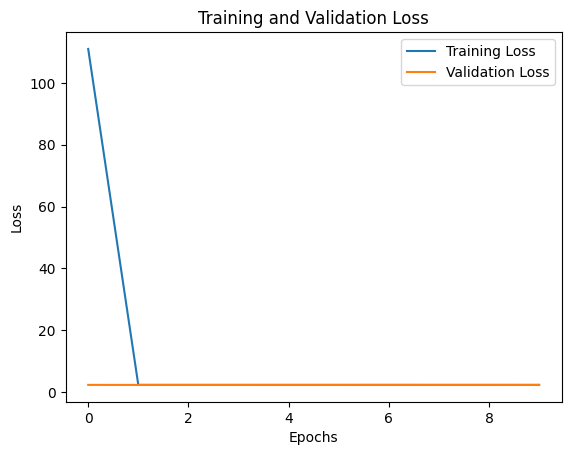

In [57]:
# Checking for overfitting: Training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

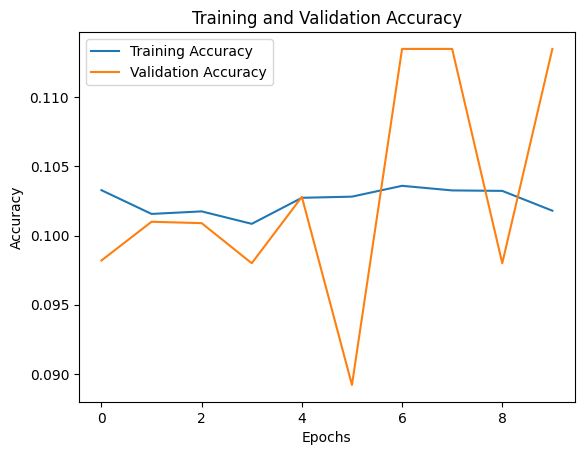

In [58]:
# Training and validation accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [59]:
y_pred = np.argmax(mnist_model4.predict(x_test), axis=-1)

313/313 [==============================] - 3s 10ms/step


In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 2000x3000 with 0 Axes>

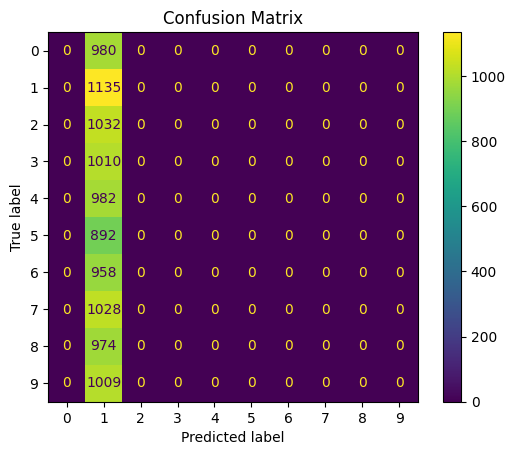

In [61]:
plt.figure(dpi=200, figsize=(10,15))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
plt.title('Confusion Matrix')
plt.show()